In [1]:
from fik import *

import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

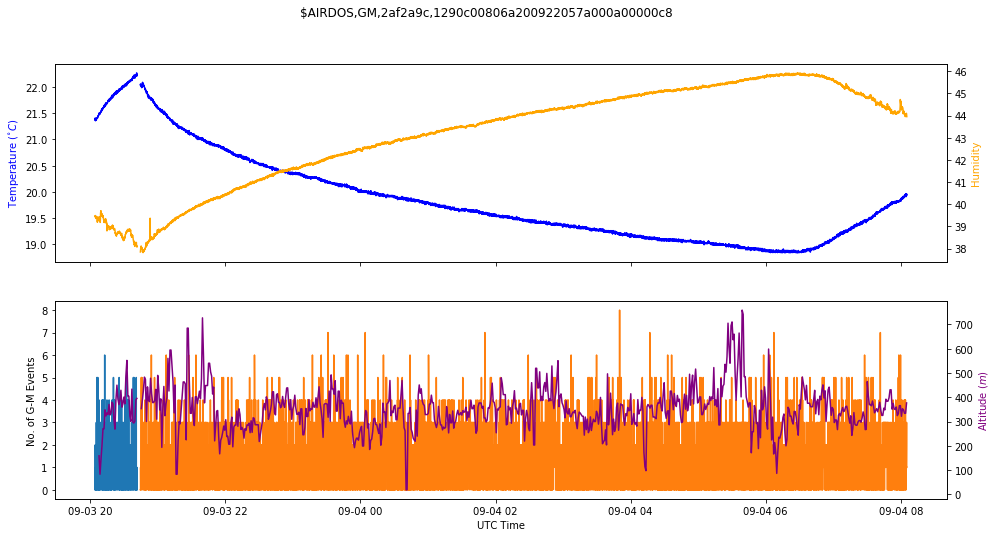

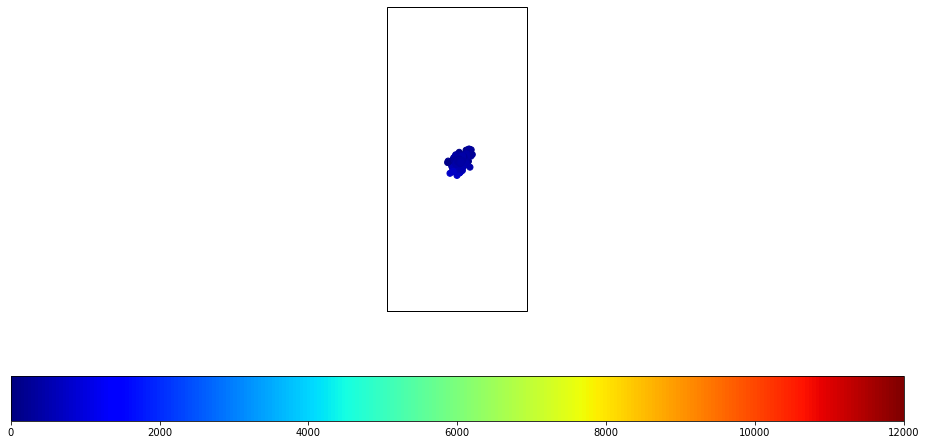

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 8), nrows=2, sharex=True)
ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

import cartopy.crs as ccrs
mapfig = plt.figure(figsize=(16, 8))
mapax = plt.axes(projection=ccrs.PlateCarree())
# set a margin around the data
mapax.set_xmargin(1.0)
mapax.set_ymargin(1.0)
mapax.coastlines(resolution='50m', color='black', linewidth=1)
'''
mapax.plot(lon, lat, 'bo', markersize=7, transform=ccrs.Geodetic())
mapax.text(lon+0.04, lat+0.04, 'Esrange', transform=ccrs.Geodetic())
'''

from matplotlib import cm, colors

alt_sm = cm.ScalarMappable(norm=colors.Normalize(0, 12000), cmap='jet')
alt_sm.set_array(np.array([]))
cb = mapfig.colorbar(alt_sm, orientation='horizontal')

for dl in DATALOG.split_runs('PFT/GM/DATALOG.TXT'):
    fig.suptitle(dl.greeting)
    if 'gm' in dl.__dict__:
        if isinstance(dl.gm.index, pd.DatetimeIndex):
            ax2.set_ylabel('No. of G-M Events')
            ax2.plot(dl.gm.index, dl.gm['GMCount'])
            ax2.set_xlabel('UTC Time')
            ax1.set_ylabel('Temperature ($^{\circ}C$)', color='blue')
            ax1.plot(dl.gm.index, dl.gm['Temp'], color='blue')
            ax1_twin.set_ylabel('Humidity', color='orange')
            ax1_twin.plot(dl.gm.index, dl.gm['Humid'], label='Humid', color='orange')
        else:
            sys.stderr.write("Skipping %d GM entries from %s" % (len(dl.gm), dl.greeting))
    
    if len(dl.nav) == 0:
        continue
    
    if isinstance(dl.nav.index, pd.DatetimeIndex):
        ax2_twin.set_ylabel('Altitude ($m$)', color='purple')
        ax2_twin.plot(dl.nav.index, dl.nav['Alt'], color='purple')
        im1 = mapax.scatter(dl.nav['Lon'],dl.nav['Lat'],c=dl.nav['Alt'],cmap='jet',norm=alt_sm.norm)
    
mapfig.show()
fig.show()

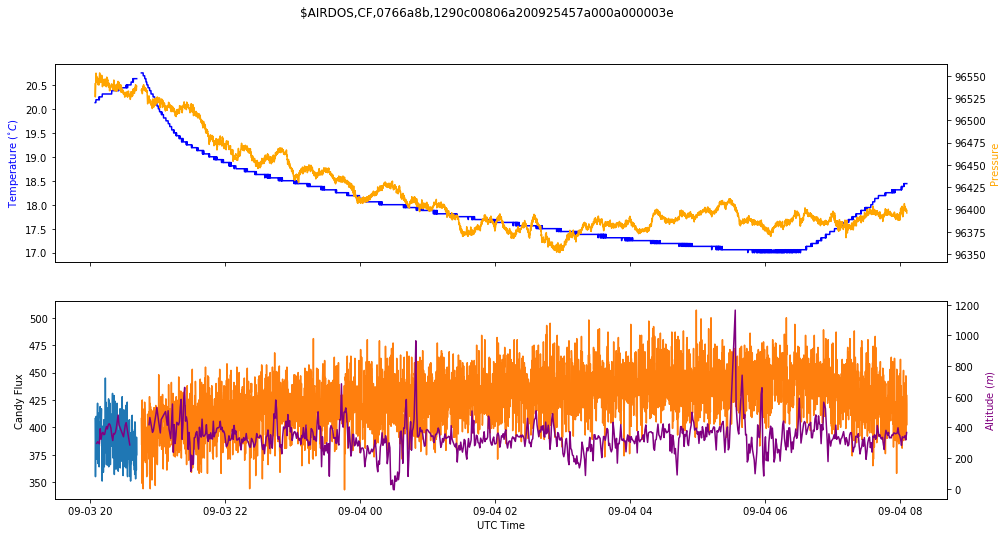

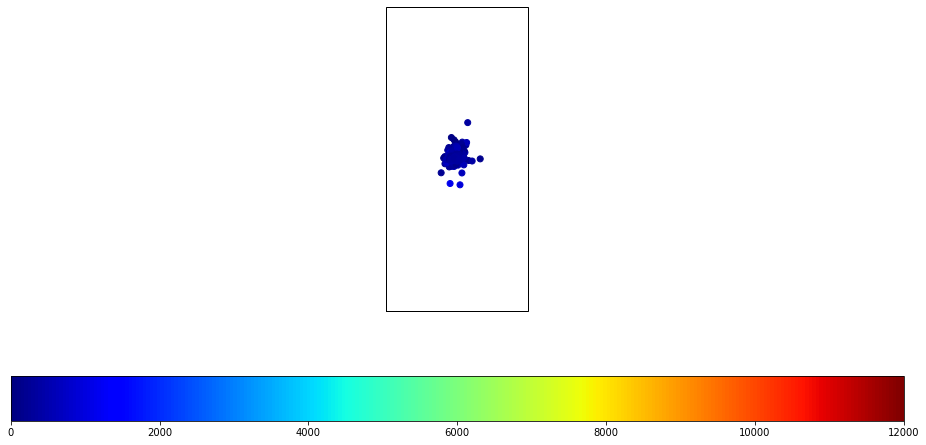

In [7]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 8), nrows=2, sharex=True)
ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

import cartopy.crs as ccrs
mapfig = plt.figure(figsize=(16, 8))
mapax = plt.axes(projection=ccrs.PlateCarree())
# set a margin around the data
mapax.set_xmargin(1.0)
mapax.set_ymargin(1.0)
mapax.coastlines(resolution='50m', color='black', linewidth=1)
'''
mapax.plot(lon, lat, 'bo', markersize=7, transform=ccrs.Geodetic())
mapax.text(lon+0.04, lat+0.04, 'Esrange', transform=ccrs.Geodetic())
'''

from matplotlib import cm, colors

alt_sm = cm.ScalarMappable(norm=colors.Normalize(0, 12000), cmap='jet')
alt_sm.set_array(np.array([]))
cb = mapfig.colorbar(alt_sm, orientation='horizontal')

for dl in DATALOG.split_runs('PFT/CF/DATALOG.TXT'):
    fig.suptitle(dl.greeting)
    
    if 'candy' in dl.__dict__:
        if isinstance(dl.candy.index, pd.DatetimeIndex):
            ax2.set_ylabel('Candy Flux')
            ax2.plot(dl.candy.index, dl.candy['Flux'])
            ax2.set_xlabel('UTC Time')
            ax1.set_ylabel('Temperature ($^{\circ}C$)', color='blue')
            ax1.plot(dl.candy.index, dl.candy['Temp'], color='blue')
            ax1_twin.set_ylabel('Pressure', color='orange')
            ax1_twin.plot(dl.candy.index, dl.candy['Pressure'], label='Pressure', color='orange')
        else:
            sys.stderr.write("Skipping %d CANDY entries from %s" % (len(dl.candy), dl.greeting))
    
    if len(dl.nav) == 0:
        continue
    
    if isinstance(dl.nav.index, pd.DatetimeIndex):
        ax2_twin.set_ylabel('Altitude ($m$)', color='purple')
        ax2_twin.plot(dl.nav.index, dl.nav['Alt'], color='purple')
        im1 = mapax.scatter(dl.nav['Lon'],dl.nav['Lat'],c=dl.nav['Alt'],cmap='jet',norm=alt_sm.norm)
    
mapfig.show()
fig.show()

No fix for run of 193 lines at $AIRDOS,FF,96051b4,1290c00806a200920856a000a00000c9
No fix for run of 3506 lines at $AIRDOS,FF,96051b4,1290c00806a200920856a000a00000c9


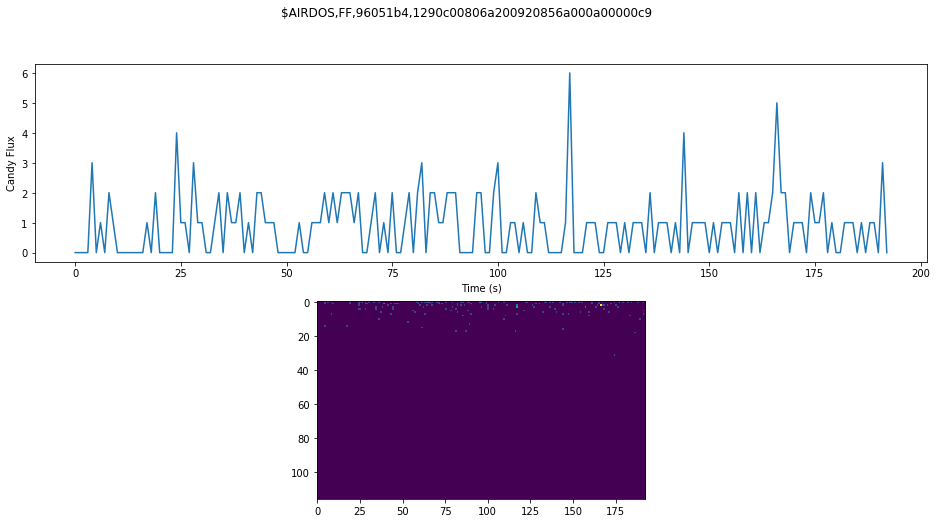

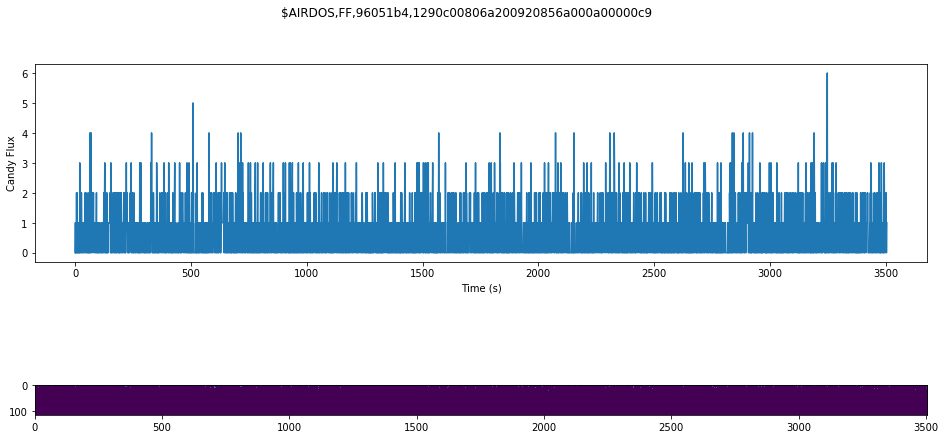

In [14]:
for dl in DATALOG.split_runs('PFT/FF/DATALOG.TXT'):
    fig, (ax1, ax2) = plt.subplots(figsize=(16, 8), nrows=2) #, sharex=True)
    fig.suptitle(dl.greeting)
    ax1.set_ylabel('Candy Flux')
    ax1.plot(dl.candy.index, dl.candy['Flux'])
    ax1.set_xlabel('Time (s)')
    
    ax2.imshow(np.array(list(dl.candy['Bins'])).T[4:120,:])